##Part A (basic text mining)

###A1. What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they appear?

In [2]:
import pandas as pd
%pylab inline
import nltk
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
import matplotlib.pyplot as plt
import pylab

Populating the interactive namespace from numpy and matplotlib


In [52]:
salaryData = pd.read_csv('Train_rev1.csv')['FullDescription'][:250]
salaryData['Raw'] = salaryData.str.decode('utf8')

def tokenize(s):
    return WhitespaceTokenizer().tokenize(s)

salary_tokens = salaryData['Raw'].map(tokenize)

def pos(s):
    return nltk.pos_tag(s)

salary_pos = salary_tokens.map(pos)

salary_pos_list = []

for list in salary_pos:
    for number in list:
        salary_pos_list.append(number)

pos_count = Counter((tag for (word,tag) in salary_pos_list))

mc_pos = pos_count.most_common(5)

mc_pos_freq = [(word,round((float(tag)/sum(pos_count.values()).astype(float))*100,2)) for (word,tag) in mc_pos]

####The top 5 parts of speech from this corpus of job descriptions are:

In [53]:
mc_pos

[('NNP', 12216), ('NN', 9947), ('IN', 6436), ('DT', 4637), ('JJ', 4371)]

####These parts of speech appear with the following frequencies:

In [54]:
mc_pos_freq

[('NNP', 20.55), ('NN', 16.73), ('IN', 10.83), ('DT', 7.8), ('JJ', 7.35)]

###A2. Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the theoretical prediction of the law.

In [76]:
salary_token_list = []

for list in salary_tokens:
    for number in list:
        salary_token_list.append(number)

sal_replacer = ['****']        
        
salary_lower = [w.lower() for w in salary_token_list if w not in sal_replacer]
        
word_count = Counter((word for word in salary_lower))

most_common_words = word_count.most_common(100)

rank_freq = [x[1] for x in most_common_words]
rank = xrange(1,101)
log_rank = [log(x) for x in xrange(1,101)]
    
inverse_rank = [1/float(i) for i in rank]

####As seen in the plot below, if we plot the frequency of top 100 most common words versus their rank on a loglog plot, we see a curve that is similar to Zipf's law for the majority of the common words. We see the curve tail off as the rank of the word decreases as many of these words have similar frequencies in our corpus at this low ranking. This differs from Zipf's law which assumes the frequencies will continue to decrease as the rank decreases.

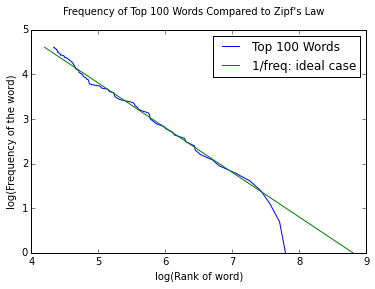

In [77]:
plt.plot(log(rank_freq),log_rank)
plt.plot(log(inverse_rank)+ 8.8,log_rank)
plt.suptitle('Frequency of Top 100 Words Compared to Zipf\'s Law')
plt.xlabel('log(Rank of word)')
plt.ylabel("log(Frequency of the word)")
plt.legend(("Top 100 Words","1/freq: ideal case"),"upper right")

###A3. If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What is their frequency?

In [78]:
wordnet_lemmatizer =  WordNetLemmatizer()

no_stops = [w for w in salary_lower if w not in stopwords.words("english")]

lemma = [wordnet_lemmatizer.lemmatize(i) for i in no_stops]

lemma_word_count = Counter((word for word in lemma))

mc_lemma_words = lemma_word_count.most_common(10)

mc_lemma_words_freq = [(word,round((float(tag)/sum(lemma_word_count.values()).astype(float))*100,2)) for (word,tag) in mc_lemma_words]

####The top 10 most common words from the corpus are:

In [79]:
mc_lemma_words

[(u'work', 324),
 (u'job', 324),
 (u'experience', 321),
 (u'chef', 277),
 (u'working', 269),
 (u'within', 266),
 (u'client', 255),
 (u'manager', 203),
 (u'candidate', 190),
 (u'team', 183)]

####These words appear with the following frequencies:

In [80]:
mc_lemma_words_freq

[(u'work', 0.9),
 (u'job', 0.9),
 (u'experience', 0.89),
 (u'chef', 0.77),
 (u'working', 0.75),
 (u'within', 0.74),
 (u'client', 0.71),
 (u'manager', 0.56),
 (u'candidate', 0.53),
 (u'team', 0.51)]